In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from tensorflow.keras.utils import to_categorical # one-hot keras encording
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import seaborn as sns

# seed 값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/bike_sharing_demand_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df['datetime'] = df['datetime'].astype('datetime64')

In [4]:
df['hour'] = df['datetime'].dt.hour

In [9]:
df = df.drop(['datetime'],axis=1)
df = df.drop(['holiday'], axis = 1)
df = df.drop(['workingday'],axis=1)
df = df.drop(['weather'],axis=1)
df = df.drop(['casual'],axis=1)

In [11]:
df = df.drop(['registered'],axis=1)

In [15]:
df = df[['season','temp','atemp','humidity','windspeed','hour','count']]
df

,season,temp,atemp,humidity,windspeed,hour,count
0,1,9.84,14.395,81,0.0000,0,16
1,1,9.02,13.635,80,0.0000,1,40
2,1,9.02,13.635,80,0.0000,2,32
3,1,9.84,14.395,75,0.0000,3,13
4,1,9.84,14.395,75,0.0000,4,1
...,...,...,...,...,...,...,...
10881,4,15.58,19.695,50,26.0027,19,336
10882,4,14.76,17.425,57,15.0013,20,241
10883,4,13.94,15.910,61,15.0013,21,168
10884,4,13.94,17.425,61,6.0032,22,129


In [17]:
dataset = df.values

In [18]:
dataset

array([[  1.    ,   9.84  ,  14.395 , ...,   0.    ,   0.    ,  16.    ],
       [  1.    ,   9.02  ,  13.635 , ...,   0.    ,   1.    ,  40.    ],
       [  1.    ,   9.02  ,  13.635 , ...,   0.    ,   2.    ,  32.    ],
       ...,
       [  4.    ,  13.94  ,  15.91  , ...,  15.0013,  21.    , 168.    ],
       [  4.    ,  13.94  ,  17.425 , ...,   6.0032,  22.    , 129.    ],
       [  4.    ,  13.12  ,  16.665 , ...,   8.9981,  23.    ,  88.    ]])

In [19]:
X = dataset[:,:-1]
Y = dataset[:,-1]
print(X,Y)

[[ 1.      9.84   14.395  81.      0.      0.    ]
 [ 1.      9.02   13.635  80.      0.      1.    ]
 [ 1.      9.02   13.635  80.      0.      2.    ]
 ...
 [ 4.     13.94   15.91   61.     15.0013 21.    ]
 [ 4.     13.94   17.425  61.      6.0032 22.    ]
 [ 4.     13.12   16.665  66.      8.9981 23.    ]] [ 16.  40.  32. ... 168. 129.  88.]


In [20]:
n_fold = 6
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [21]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [22]:
model = Sequential()
model.add(Dense(500, input_dim=6, activation='relu'))
model.add(Dense(2000, input_dim=500, activation='relu'))
model.add(Dense(1))

In [23]:
model.compile(loss='mean_squared_error',
          optimizer='adam',
          metrics=['accuracy'])

In [ ]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/last_weight.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=500)

h = model.fit(x_train, y_train, validation_split= 0.2, epochs=10000000, batch_size=1000, verbose=0, callbacks=[early_stopping_callback,checkpointer])

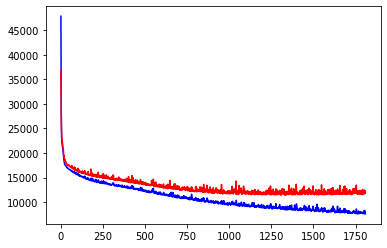

In [25]:
plt.plot(h.history['loss'],'b')
plt.plot(h.history['val_loss'],'r')
plt.show()

In [26]:
print(h.history['loss'][-1])

7583.225985338385


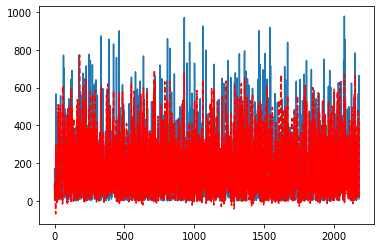

In [36]:
plt.plot(y_test)
plt.plot(model.predict(x_test),'r--')
plt.show()

In [41]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2178/2178 [==============================] - 0s 104us/step
## evaluation loss and_metrics ##
[11824.784896192034, 0.015610652044415474]


In [34]:
A = model.predict(x_test)

In [ ]:
A

In [ ]:
B = np.array(y_test)
B

In [ ]:
C =np.append(A,B,axis=1)
C

In [ ]:
print(h.acc.mean())